In [16]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

img = cv2.imread('../piedpiper.png')

cv2.imwrite('../compressed_pp.png', img, [cv2.IMWRITE_PNG_COMPRESSION])


True

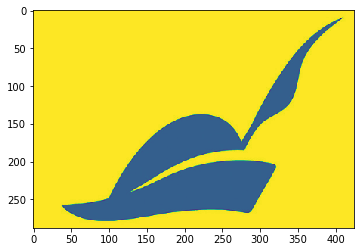

In [96]:
img = cv2.imread('../piedpiper.png', cv2.IMREAD_COLOR)
gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
yuv_img = cv2.cvtColor(img, cv2.COLOR_BGR2YUV)
y,u,v = cv2.split(yuv_img)

plt.imshow(gray_img)

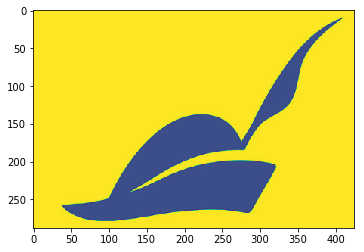

In [8]:
plt.imshow(y)

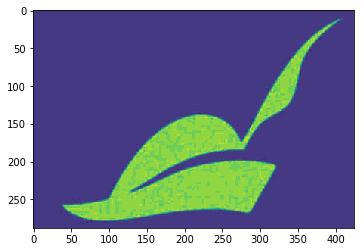

In [10]:
plt.imshow(u)

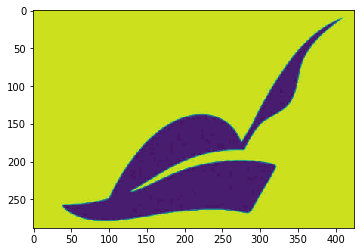

In [11]:
plt.imshow(v)

In [12]:
g,b,r = cv2.split(img)
gbr_img = cv2.merge((g,b,r))
rbr_img = cv2.merge((r,b,r))

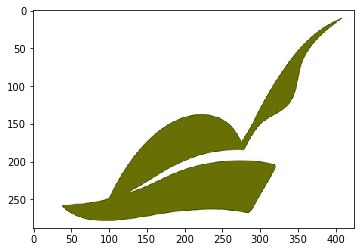

In [13]:
plt.imshow(gbr_img)

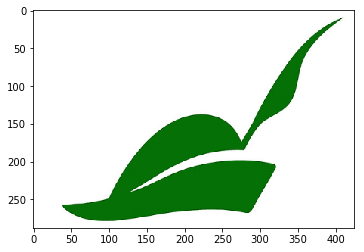

In [14]:
plt.imshow(rbr_img)

### Transformation

> How warping works?

Translation basically means that we are __shifting the image by adding/subtracting the x and y coordinates__. 

In order to do this, we need to create a __transformation matrix__:

![](../images/matrix.png)

Here, the tx and ty values are the x and y translation values

the image will be moved by __x units to the right, and by y units downwards__. So once we create a matrix like this, we can use the function, __warpAffine__, to apply it to our image. 


__The third argument in warpAffine refers to the number of rows and columns in the resulting image.__

As follows, it passes __InterpolationFlags which defines combination of interpolation methods__.

Since the number of rows and columns is the same as the original image, __the resultant image is going to get cropped.__

The reason for this is we didn't have enough space in the output when we applied the translation matrix. To avoid cropping, we should:

```python
img_translation = cv2.warpAffine(img, translation_matrix,
 (num_cols + 70, num_rows + 110))
```

To move the image to the middle of a bigger image frame

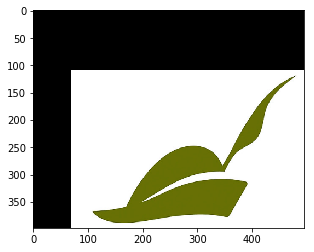

In [33]:
num_rows, num_cols = img.shape[:2]

translation_matrix = np.float32([ [1,0,70], [0,1,110] ])
img_translation = cv2.warpAffine(img, translation_matrix, (num_cols + 70, num_rows + 110))
plt.imshow(img_translation)

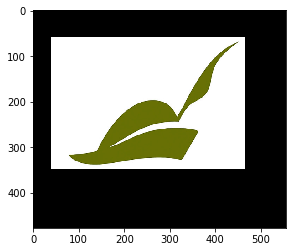

In [34]:
translation_matrix = np.float32([ [1,0,-30], [0,1,-50] ])
img_translation = cv2.warpAffine(img_translation, translation_matrix, (num_cols + 70 + 60, num_rows + 110 + 80))
plt.imshow(img_translation)

Moreover, there are two more arguments, borderMode and borderValue, that allow us to __fill up the empty borders of the translation with a pixel extrapolation method__:

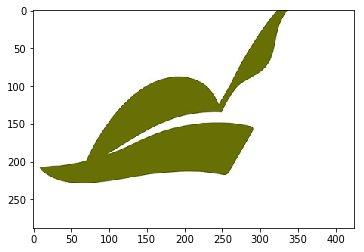

In [35]:
img_translation = cv2.warpAffine(img, translation_matrix, (num_cols, num_rows), cv2.INTER_LINEAR, cv2.BORDER_WRAP, 1)
plt.imshow(img_translation)

### Rotation

Using getRotationMatrix2D, we can specify the center point around which the image would be rotated as the first argument, then the angle of rotation in degrees, and a scaling factor for the image at the end. __We use 0.7 to shrink the image by 30% so it fits in the frame.__

![](../images/matrix2.png)

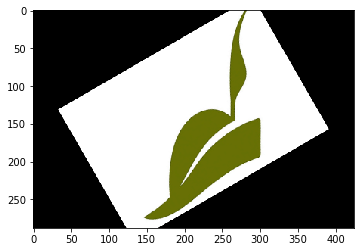

In [38]:
rotation_matrix = cv2.getRotationMatrix2D((num_cols/2, num_rows/2), 30, 0.7)
img_rotation = cv2.warpAffine(img, rotation_matrix, (num_cols, num_rows))
plt.imshow(img_rotation)

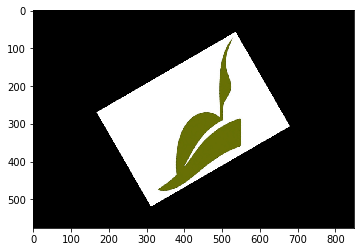

In [40]:
num_rows, num_cols = img.shape[:2]

translation_matrix = np.float32([ [1,0,int(0.5*num_cols)], [0,1,int(0.5*num_rows)] ])
rotation_matrix = cv2.getRotationMatrix2D((num_cols, num_rows), 30, 1)

img_translation = cv2.warpAffine(img, translation_matrix, (2*num_cols, 2*num_rows))
img_rotation = cv2.warpAffine(img_translation, rotation_matrix, (num_cols*2, num_rows*2))

plt.imshow(img_rotation)

### Image scaling


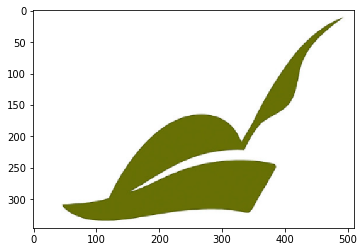

In [42]:
img_scaled = cv2.resize(img,None,fx=1.2, fy=1.2, interpolation = cv2.INTER_LINEAR)
plt.imshow(img_scaled)

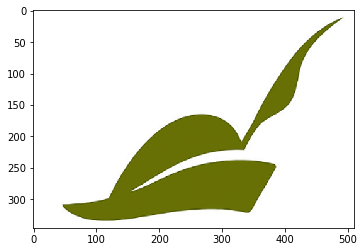

In [43]:
img_scaled = cv2.resize(img,None,fx=1.2, fy=1.2, interpolation = cv2.INTER_CUBIC)
plt.imshow(img_scaled)

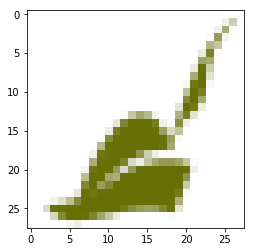

In [47]:
img_scaled = cv2.resize(img, (28, 28), interpolation = cv2.INTER_AREA)
plt.imshow(img_scaled)

### Shear

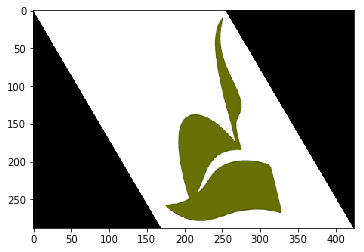

In [48]:
rows, cols = img.shape[:2]
src_points = np.float32([[0,0], [cols-1,0], [0,rows-1]])
dst_points = np.float32([[0,0], [int(0.6*(cols-1)),0], [int(0.4*(cols-1)),rows-1]])
affine_matrix = cv2.getAffineTransform(src_points, dst_points)
img_output = cv2.warpAffine(img, affine_matrix, (cols,rows))
plt.imshow(img)
plt.imshow(img_output)

### mirror


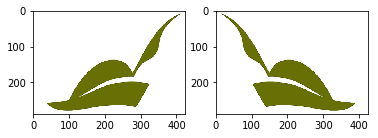

In [51]:
src_points = np.float32([[0,0], [cols-1,0], [0,rows-1]])
dst_points = np.float32([[cols-1,0], [0,0], [cols-1,rows-1]])
affine_matrix = cv2.getAffineTransform(src_points, dst_points)
img_output = cv2.warpAffine(img, affine_matrix, (cols,rows))
fig=plt.figure()
fig.add_subplot(1, 2, 1)
plt.imshow(img)
fig.add_subplot(1, 2, 2)
plt.imshow(img_output)

### Projective transformations

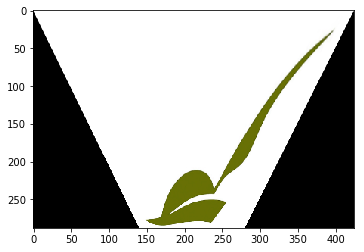

In [52]:
rows, cols = img.shape[:2]
src_points = np.float32([[0,0], [cols-1,0], [0,rows-1], [cols-1,rows-1]])
dst_points = np.float32([[0,0], [cols-1,0], [int(0.33*cols),rows-1], [int(0.66*cols),rows-1]])
projective_matrix = cv2.getPerspectiveTransform(src_points, dst_points)
img_output = cv2.warpPerspective(img, projective_matrix, (cols,rows))
plt.imshow(img)
plt.imshow(img_output)

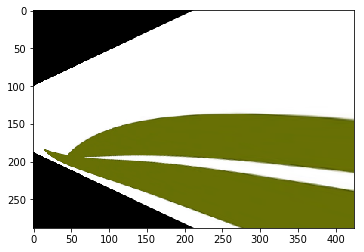

In [53]:
src_points = np.float32([[0,0], [0,rows-1], [cols/2,0],[cols/2,rows-1]])
dst_points = np.float32([[0,100], [0,rows-101], [cols/2,0],[cols/2,rows-1]])
projective_matrix = cv2.getPerspectiveTransform(src_points, dst_points)
img_output = cv2.warpPerspective(img, projective_matrix, (cols,rows))
plt.imshow(img)
plt.imshow(img_output)


### Warping

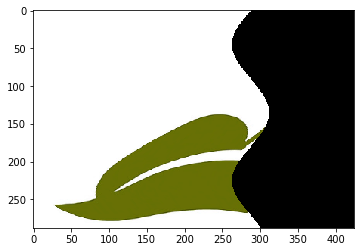

In [55]:
# Vertical wave 
import math
img_output = np.zeros(img.shape, dtype=img.dtype) 
 
for i in range(rows): 
    for j in range(cols): 
        offset_x = int(25.0 * math.sin(2 * 3.14 * i / 180)) 
        offset_y = 0 
        if j+offset_x < rows: 
            img_output[i,j] = img[i,(j+offset_x)%cols] 
        else: 
            img_output[i,j] = 0 
plt.imshow(img) 
plt.imshow(img_output) 

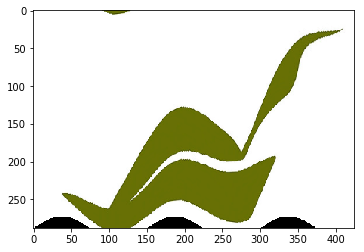

In [56]:
# Horizontal wave 
 
img_output = np.zeros(img.shape, dtype=img.dtype) 
 
for i in range(rows): 
    for j in range(cols): 
        offset_x = 0 
        offset_y = int(16.0 * math.sin(2 * 3.14 * j / 150)) 
        if i+offset_y < rows: 
            img_output[i,j] = img[(i+offset_y)%rows,j] 
        else: 
            img_output[i,j] = 0 
plt.imshow(img_output) 
 

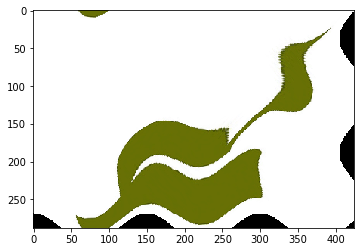

In [57]:
# Both horizontal and vertical  
 
img_output = np.zeros(img.shape, dtype=img.dtype) 
 
for i in range(rows): 
    for j in range(cols): 
        offset_x = int(20.0 * math.sin(2 * 3.14 * i / 150)) 
        offset_y = int(20.0 * math.cos(2 * 3.14 * j / 150)) 
        if i+offset_y < rows and j+offset_x < cols: 
            img_output[i,j] = img[(i+offset_y)%rows,(j+offset_x)%cols] 
        else: 
            img_output[i,j] = 0 
plt.imshow(img_output)  

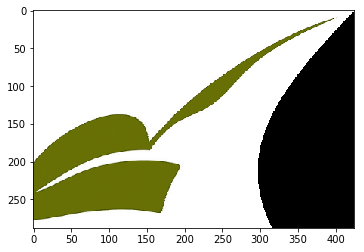

In [59]:
img_output = np.zeros(img.shape, dtype=img.dtype) 
 
for i in range(rows): 
    for j in range(cols): 
        offset_x = int(128.0 * math.sin(2 * 3.14 * i / (2*cols))) 
        offset_y = 0 
        if j+offset_x < cols: 
            img_output[i,j] = img[i,(j+offset_x)%cols] 
        else: 
            img_output[i,j] = 0 
plt.imshow(img_output) 

### Detecting Edges and Applying Image Filters

### 2D convolution

We basically apply a mathematical operator to each pixel, and change its value in some way. 

To apply this mathematical operator, we use another matrix called a kernel.

The kernel is usually much smaller in size than the input image. 

__For each pixel in the image, we take the kernel and place it on top so that the center of the kernel coincides with the pixel under consideration.__


__We then multiply each value in the kernel matrix with the corresponding values in the image, and then sum it up.__ This is the new value that will be applied to this position in the output image.

Here, __the kernel is called the image filter__ and the process of __applying this kernel to the given image is called image filtering.__


_Depending on the values in the kernel, it performs different functions such as blurring, detecting edges, and so on._


![](../images/filter.png)


- identity kernel. 

This kernel doesn't really change the input image

![](../images/ik.png)

### Blurring (also called a low pass filter: allow low frequencies, and blocks higher frequencies)

> what does frequency mean in an image?

frequency refers to __the rate of change of pixel values__. 

So we can say that __the sharp edges would be high-frequency content because the pixel values change rapidly in that region.__

thus, plain areas would be low-frequency content. 

So, a low pass filter would try to smooth the edges.

Blurring refers to __averaging the pixel values within a neighborhood.__

We can choose the size of the kernel depending on how much we want to smooth the image,

If we've chosen a bigger size, then you will be averaging over a larger area. This tends to increase the smoothing effect.


- low pass kernel example:

![](../images/blurring.png)

- normalization:
    - We are dividing the matrix by 9 because we want the values to sum up to one, because we don't want to artificially increase the intensity value at that pixel's location
    - So, we should normalize the kernel before applying it to an image


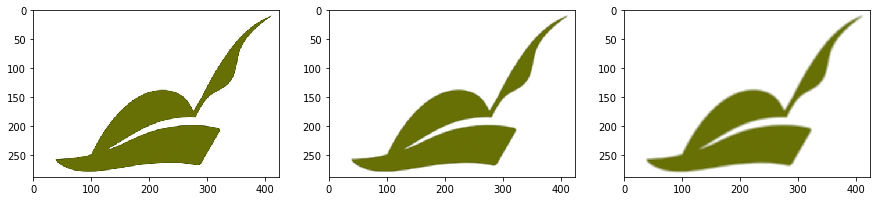

In [63]:
rows, cols = img.shape[:2] 

kernel_identity = np.array([[0,0,0], [0,1,0], [0,0,0]]) 
kernel_3x3 = np.ones((3,3), np.float32) / 9.0      # Divide by 9 to normalize the kernel
kernel_5x5 = np.ones((5,5), np.float32) / 25.0     # Divide by 25 to normalize the kernel

fig=plt.figure(figsize=(15,5))

fig.add_subplot(1,3,1)
# value -1 is to maintain source image depth
output = cv2.filter2D(img, -1, kernel_identity) 
plt.imshow(output) 

fig.add_subplot(1,3,2)
output = cv2.filter2D(img, -1, kernel_3x3) 
plt.imshow(output) 

fig.add_subplot(1,3,3)
output = cv2.filter2D(img, -1, kernel_5x5) 
plt.imshow(output) 

#### Size of the kernel versus blurriness

__we can see that the images are keep getting blurrier as we increase the kernel size.__

_The reason for this is because when we increase the kernel size, we are averaging over a larger area. This tends to have a larger blurring effect._


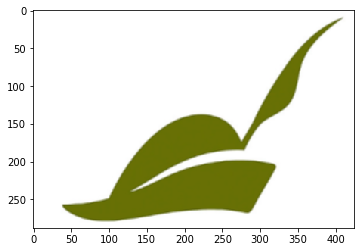

In [65]:
# alternative way
output = cv2.blur(img, (3,3))
plt.imshow(output)

### Motion blur (motion blur kernel averages the pixel values in a particular direction, like a directional low pass filter)

- for example:

![](../images/motion.png)

This kernel blurs the image in a horizontal direction. 

The amount of blurring will depend on the size of the kernel. 

So, if we want to make the image blurrier, just pick a bigger size for the kernel. 

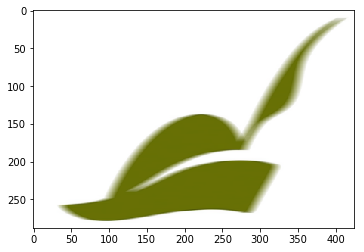

In [66]:
size = 15 
 
# generating the kernel 
kernel_motion_blur = np.zeros((size, size)) 
kernel_motion_blur[int((size-1)/2), :] = np.ones(size) 
kernel_motion_blur = kernel_motion_blur / size # normalization

output = cv2.filter2D(img, -1, kernel_motion_blur) 
 
plt.imshow(output) 

### Embossing (饰以浮雕花纹的)

__We basically take each pixel, and replace it with a shadow or a highlight. __



In [91]:
img_emboss_input = cv2.imread('../house.png') 

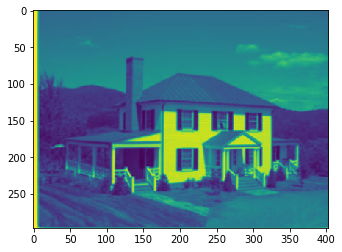

In [92]:
# generating the kernels 
kernel_emboss_1 = np.array([[0,-1,-1], 
                            [1,0,-1], 
                            [1,1,0]]) 
kernel_emboss_2 = np.array([[-1,-1,0], 
                            [-1,0,1], 
                            [0,1,1]]) 
kernel_emboss_3 = np.array([[1,0,0], 
                            [0,0,0], 
                            [0,0,-1]]) 
 
# converting the image to grayscale 
gray_img = cv2.cvtColor(img_emboss_input,cv2.COLOR_BGR2GRAY) 
plt.imshow(gray_img)

In [93]:
# applying the kernels to the grayscale image and adding the offset to produce the shadow
output_1 = cv2.filter2D(gray_img, -1, kernel_emboss_1) + 128
output_2 = cv2.filter2D(gray_img, -1, kernel_emboss_2) + 128 
output_3 = cv2.filter2D(gray_img, -1, kernel_emboss_3) + 128 

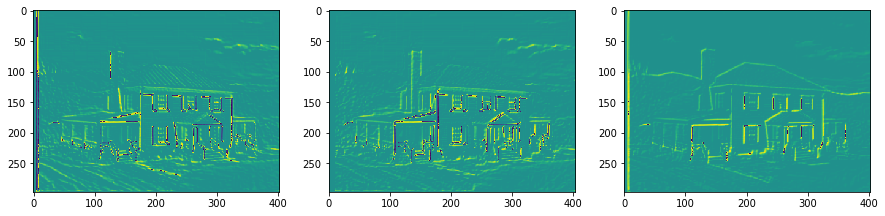

In [94]:
fig=plt.figure(figsize=(15,5))
fig.add_subplot(1,3,1)
plt.imshow(output_1) 
fig.add_subplot(1,3,2)
plt.imshow(output_2) 
fig.add_subplot(1,3,3)
plt.imshow( output_3) 

### Edge detection

detect sharp edges in the image, and producing a binary image as the output. 

__We can think of edge detection as a high pass filtering operation, which allows high-frequency content to pass through and blocks the low-frequency content.__

Since edges are high-frequency content. In edge detection, we want to retain these edges and discard everything else. 

- Sobel filter

![](../images/sobel1.png)

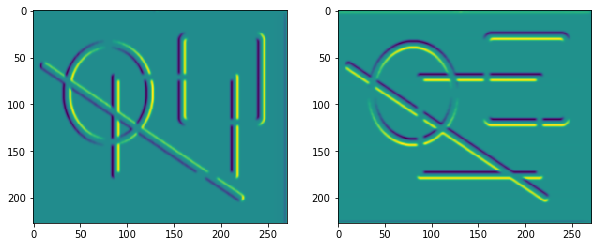

In [113]:
# Attention!! first need to convert normal image to GRAYSCALE!
gray_img = cv2.imread('../images/shapes.png', cv2.IMREAD_GRAYSCALE) 
rows, cols = gray_img.shape 
 
# use depth of cv2.CV_64F.
sobel_horizontal = cv2.Sobel(gray_img, cv2.CV_64F, 1, 0, ksize=5)

# kernel size can be: 
# 1,3,5 or 7.
sobel_vertical = cv2.Sobel(gray_img, cv2.CV_64F, 0, 1, ksize=5) 

fig=plt.figure(figsize=(10,5))
fig.add_subplot(1,2,1)
plt.imshow(sobel_horizontal) 
fig.add_subplot(1,2,2)
plt.imshow(sobel_vertical) 

As we can see here, the Sobel filter detects edges in either a horizontal or vertical direction and it doesn't give us a holistic view of all the edges. 

> Solutions?

- Laplacian filter. 


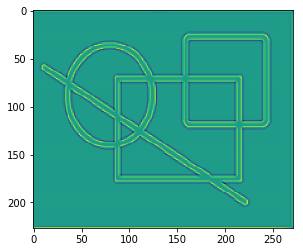

In [105]:
laplacian = cv2.Laplacian(gray_img, cv2.CV_64F)
plt.imshow(laplacian)

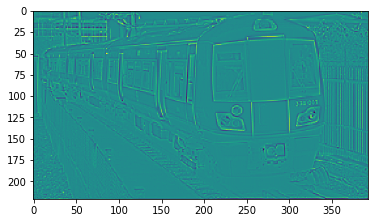

In [110]:
gray_img = cv2.imread('../images/train.png', cv2.IMREAD_GRAYSCALE) 
laplacian = cv2.Laplacian(gray_img, cv2.CV_64F)
plt.imshow(laplacian)

As we can see in the preceding images, the Laplacian kernel gives rise to a __noisy output__

> Solution?

- the Canny edge detector:

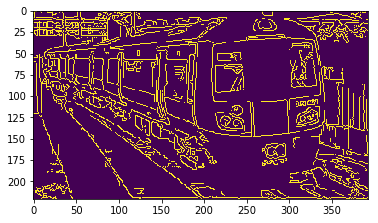

In [111]:
canny = cv2.Canny(gray_img, 50, 240) 
plt.imshow(canny)

Canny in opencv takes two numbers as arguments to indicate the thresholds. __The second argument is called the low threshold value, and the third argument is called the high threshold value.__

### Erosion and dilation (primarily defined for binary images, but we can also use them on grayscale images)

__Erosion basically strips out the outermost layer of pixels in a structure, whereas dilation adds an extra layer of pixels to a structure.__

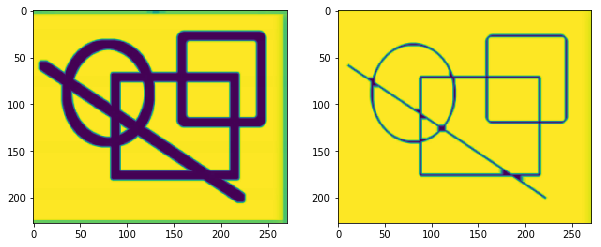

In [114]:
kernel = np.ones((5,5), np.uint8) 
 
img_erosion = cv2.erode(gray_img, kernel, iterations=1) 
img_dilation = cv2.dilate(gray_img, kernel, iterations=1) 
 
fig=plt.figure(figsize=(10,5))
fig.add_subplot(1,2,1)
plt.imshow(img_erosion) 
fig.add_subplot(1,2,2)
plt.imshow(img_dilation) 

### Creating a vignette filter (basically focuses the brightness on a particular part of the image and the other parts look faded)

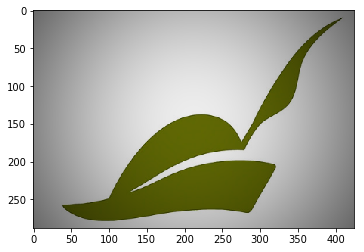

In [128]:
rows, cols = img.shape[:2] 
 
# generating vignette mask using Gaussian kernels 
kernel_x = cv2.getGaussianKernel(cols,200) # 200: the standard deviation of the Gaussian, and it controls the radius of the bright central region
kernel_y = cv2.getGaussianKernel(rows,200) 
kernel = kernel_y * kernel_x.T 
mask = 255 * kernel / np.linalg.norm(kernel) # if don't scale it up, the image will look black, because all the pixel values will be close to zero after superimposing the mask
output = np.copy(img) 
 
# applying the mask to each channel in the input image 
for i in range(3): 
    output[:,:,i] = output[:,:,i] * mask 
plt.imshow(output) 

### shift focus


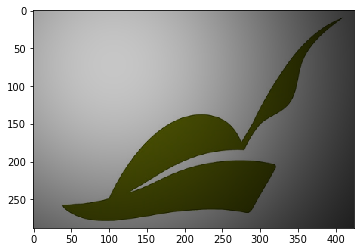

In [129]:
kernel_x = cv2.getGaussianKernel(int(1.5*cols),200) 
kernel_y = cv2.getGaussianKernel(int(1.5*rows),200) 
kernel = kernel_y * kernel_x.T 
mask = 255 * kernel / np.linalg.norm(kernel) 
mask = mask[int(0.5*rows):, int(0.5*cols):] 
output = np.copy(img) 
 
# applying the mask to each channel in the input image 
for i in range(3): 
    output[:,:,i] = output[:,:,i] * mask 
plt.imshow(output) 

### Enhancing the contrast in an image

Whenever we capture images in low-light conditions, the images turn out to be dark. 

The reason this happens is because the pixel values tend to concentrate near zero when we capture the images under such conditions. 

- histogram equalization

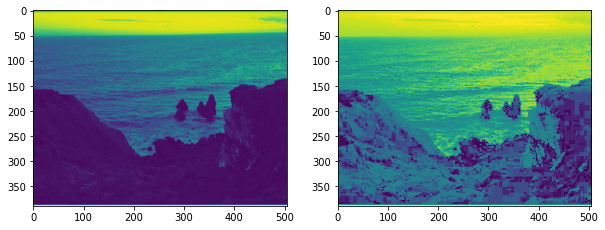

In [142]:
# equalize the histogram of the input image 
img=cv2.imread("../images/dark.png", 0)
histeq = cv2.equalizeHist(img) 

fig=plt.figure(figsize=(10,5))
fig.add_subplot(1,2,1)
plt.imshow(img) 
fig.add_subplot(1,2,2)
plt.imshow(histeq) 

> For colored image?

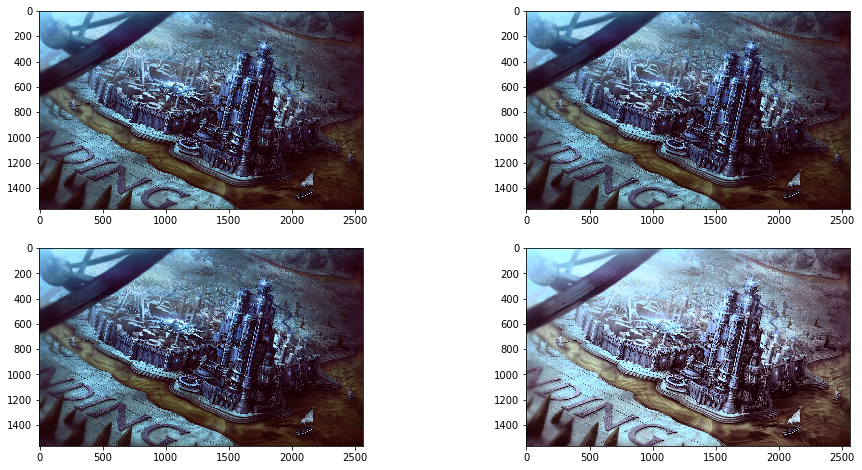

In [148]:
img = cv2.imread('../got.png') 
 
img_yuv = cv2.cvtColor(img, cv2.COLOR_BGR2YUV) 
 
# equalize the histogram of the Y channel 
img_yuv[0,:,:] = cv2.equalizeHist(img_yuv[0,:,:]) 
 
img_output1 = cv2.cvtColor(img_yuv, cv2.COLOR_YUV2BGR) 

# equalize the histogram of the Y channel 
img_yuv[:,0,:] = cv2.equalizeHist(img_yuv[:,0,:]) 
 
img_output2 = cv2.cvtColor(img_yuv, cv2.COLOR_YUV2BGR) 

# equalize the histogram of the Y channel 
img_yuv[:,:,0] = cv2.equalizeHist(img_yuv[:,:,0]) 
 
img_output3 = cv2.cvtColor(img_yuv, cv2.COLOR_YUV2BGR) 
 
fig=plt.figure(figsize=(16,8))
fig.add_subplot(2,2,1)
plt.imshow(img) 
fig.add_subplot(2,2,2)
plt.imshow(img_output1)
fig.add_subplot(2,2,3)
plt.imshow(img_output2) 
fig.add_subplot(2,2,4)
plt.imshow(img_output3) 